# **A3 DE ANÁLISE DE DADOS E BIG DATA**

## ALUNOS

- João Elias Ferraz Santana - RA: 12724146535
- João Vitor Fernandes Ribeiro – RA: 12722120441
- João Victor Azevedo Santana Cerqueira – RA: 1272023163
- Matheus Moura Rodrigues Costa – RA: 1272121774
- Michel Santana Garcia – RA: 1272217974

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

# Sobre Obesidade

## Abrindo o DataSet Obesidade

In [ ]:
#Abrinndo o gabarito
df_obesidade_gabarito = pd.read_csv('https://raw.githubusercontent.com/eng-joaoelias/AnaliseDadosBigData/main/DataSetADBD/obesidade-limpo.csv', sep = ',', index_col='Unnamed: 0')

In [ ]:
#Verificando a quantidade de países
len(df_obesidade_gabarito['Country'].unique())

195

In [ ]:
# Carregar os dados do arquivo CSV original
url = 'https://raw.githubusercontent.com/eng-joaoelias/AnaliseDadosBigData/main/DataSetADBD/obesidade.csv'
df_obesidade_original = pd.read_csv(url)
df_obesidade_original.head()

,Unnamed: 0,2016,2016.1,2016.2,2015,2015.1,2015.2,2014,2014.1,2014.2,...,1978.2,1977,1977.1,1977.2,1976,1976.1,1976.2,1975,1975.1,1975.2
0,NaN,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...",...,"Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great...","Prevalence of obesity among adults, BMI &Great..."
1,NaN,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,...,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years,18+ years
2,Country,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female,...,Female,Both sexes,Male,Female,Both sexes,Male,Female,Both sexes,Male,Female
3,Afghanistan,5.5 [3.4-8.1],3.2 [1.3-6.4],7.6 [4.3-12.4],5.2 [3.3-7.7],3.0 [1.3-6.0],7.3 [4.1-11.8],4.9 [3.1-7.3],2.8 [1.2-5.6],7.0 [4.0-11.3],...,0.9 [0.3-2.2],0.6 [0.2-1.2],0.2 [0.0-0.7],0.9 [0.3-2.1],0.5 [0.2-1.1],0.2 [0.0-0.7],0.8 [0.2-2.0],0.5 [0.2-1.1],0.2 [0.0-0.6],0.8 [0.2-2.0]
4,Albania,21.7 [17.0-26.7],21.6 [14.8-29.0],21.8 [15.3-28.9],21.1 [16.6-26.0],20.9 [14.4-28.1],21.3 [15.1-28.1],20.5 [16.2-25.1],20.2 [13.9-27.3],20.8 [14.9-27.4],...,9.1 [4.6-15.5],6.8 [4.0-10.7],4.8 [2.0-9.3],8.9 [4.3-15.4],6.7 [3.8-10.6],4.6 [1.8-9.2],8.8 [4.1-15.4],6.5 [3.6-10.5],4.4 [1.7-9.2],8.6 [3.9-15.4]


## Filtre as informações corretas para apresentar os resultados de obesidade.

1. **Extrai a lista de países** da coluna 1 do DataFrame original, a partir da linha 4.
2. **Repete cada país 126 vezes** para corresponder ao formato de saída desejado.
3. **Gera a lista de anos** de 2016 a 1975, repetida 3 vezes para cada país.
4. **Cria a lista de sexos** com 'Both sexes', 'Male', 'Female', repetida 195 vezes (para cada país e ano).
5. **Extrai os dados de obesidade** correspondentes para cada país e adiciona esses dados à coluna 'Obesity (%)'.
6. **Cria um novo DataFrame** com as colunas 'Country', 'Year', 'Sex' e 'Obesity (%)'.

In [ ]:
# Extrair a lista de países
countries = df_obesidade_original.iloc[3:, 0].repeat(126).reset_index(drop=True)

# Gerar a lista de anos (2016-1975) repetida para cada país
years = []
for year in range(2016, 1974, -1):
    years.extend([year] * 3)
years = years * len(countries.unique())

# Criar a lista de sexos, repetida 195 vezes
sexes = ['Both sexes', 'Male', 'Female'] * (len(countries.unique()) * (2016 - 1975 + 1))

# Extrair os dados de obesidade
data = []
for i, country in enumerate(countries.unique()):
    country_data = df_obesidade_original.iloc[3 + i, 1:].values
    data.extend(country_data)

# Criar o DataFrame final
df_obesidade_reorganizado = pd.DataFrame({
    'Country': countries,
    'Year': years,
    'Obesity (%)': data,
    'Sex': sexes
})

# Exibir o DataFrame resultante
df_obesidade_reorganizado

,Country,Year,Obesity (%),Sex
0,Afghanistan,2016,5.5 [3.4-8.1],Both sexes
1,Afghanistan,2016,3.2 [1.3-6.4],Male
2,Afghanistan,2016,7.6 [4.3-12.4],Female
3,Afghanistan,2015,5.2 [3.3-7.7],Both sexes
4,Afghanistan,2015,3.0 [1.3-6.0],Male
...,...,...,...,...
24565,Zimbabwe,1976,0.5 [0.1-1.3],Male
24566,Zimbabwe,1976,7.0 [3.3-12.4],Female
24567,Zimbabwe,1975,3.7 [1.7-6.5],Both sexes
24568,Zimbabwe,1975,0.4 [0.1-1.3],Male


Conversão da coluna 'Year' para int:

In [ ]:
df_obesidade_reorganizado['Year'] = df_obesidade_reorganizado['Year'].astype(int)

Ordenação dos dados pelo país e ano:

In [ ]:
df_obesidade_reorganizado = df_obesidade_reorganizado.sort_values(by=['Country', 'Year']).reset_index(drop=True)

In [ ]:
df_obesidade_reorganizado

,Country,Year,Obesity (%),Sex
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes
1,Afghanistan,1975,0.2 [0.0-0.6],Male
2,Afghanistan,1975,0.8 [0.2-2.0],Female
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes
4,Afghanistan,1976,0.2 [0.0-0.7],Male
...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male


In [ ]:
print((df_obesidade_reorganizado == df_obesidade_gabarito).value_counts()) #verificando igualdade entre os datasets

Country  Year  Obesity (%)  Sex 
True     True  True         True    24570
Name: count, dtype: int64


## Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [ ]:
# Extrair os três primeiros caracteres da coluna 'Obesity (%)' e converter para float
df_obesidade_reorganizado['Obesity'] = pd.to_numeric(df_obesidade_reorganizado['Obesity (%)'].str.extract(r'(\d+\.\d+|\d+)')[0], errors='coerce')
'''
Regex para extração: A expressão regular r'(\d+\.\d+|\d+)' captura qualquer sequência de dígitos que pode ter ou não um ponto decimal. Ela funciona assim:

\d+: captura um ou mais dígitos.
\.: captura um ponto literal.
(\d+\.\d+|\d+): captura uma sequência de dígitos que pode ou não ter um ponto decimal.
'''
df_obesidade_reorganizado

,Country,Year,Obesity (%),Sex,Obesity
0,Afghanistan,1975,0.5 [0.2-1.1],Both sexes,0.5
1,Afghanistan,1975,0.2 [0.0-0.6],Male,0.2
2,Afghanistan,1975,0.8 [0.2-2.0],Female,0.8
3,Afghanistan,1976,0.5 [0.2-1.1],Both sexes,0.5
4,Afghanistan,1976,0.2 [0.0-0.7],Male,0.2
...,...,...,...,...,...
24565,Zimbabwe,2015,4.5 [2.4-7.6],Male,4.5
24566,Zimbabwe,2015,24.8 [18.9-31.3],Female,24.8
24567,Zimbabwe,2016,15.5 [12.0-19.2],Both sexes,15.5
24568,Zimbabwe,2016,4.7 [2.5-8.0],Male,4.7


In [ ]:
#Procurando por valores nulos na coluna de obesidade
df_obesidade_reorganizado[pd.isna(df_obesidade_reorganizado['Obesity'])]

,Country,Year,Obesity (%),Sex,Obesity
14112,Monaco,1975,No data,Both sexes,NaN
14113,Monaco,1975,No data,Male,NaN
14114,Monaco,1975,No data,Female,NaN
14115,Monaco,1976,No data,Both sexes,NaN
14116,Monaco,1976,No data,Male,NaN
...,...,...,...,...,...
20911,Sudan,2015,No data,Male,NaN
20912,Sudan,2015,No data,Female,NaN
20913,Sudan,2016,No data,Both sexes,NaN
20914,Sudan,2016,No data,Male,NaN


In [ ]:
# Remover registros com NaN em 'Obesity' (coluna com os dados de obesidade tratados como float)
df_obesidade_reorganizado = df_obesidade_reorganizado.dropna(subset=['Obesity'])

In [ ]:
#Verificando pela contegem de nulos em todas as colunas
print(df_obesidade_reorganizado.isnull().sum())

Country        0
Year           0
Obesity (%)    0
Sex            0
Obesity        0
dtype: int64


## Os dados entre homens mulheres são parecidos? Informe com números.

In [ ]:
# Filtrar o DataFrame para incluir apenas as linhas onde a coluna "Sex" é igual a "Male"
male_df = df_obesidade_reorganizado[df_obesidade_reorganizado['Sex'] == 'Male']

# Calcular a média da coluna "Obesity no interval" para os valores filtrados
media_porc_obesidade_homem = male_df['Obesity'].mean()
print("Media de obesidade de homens: {}".format(media_porc_obesidade_homem))

Media de obesidade de homens: 9.332984293193716


In [ ]:
# Filtrar o DataFrame para incluir apenas as linhas onde a coluna "Sex" é igual a "Male"
female_df = df_obesidade_reorganizado[df_obesidade_reorganizado['Sex'] == 'Female']

# Calcular a média da coluna "Obesity no interval" para os valores filtrados
media_porc_obesidade_mulher = female_df['Obesity'].mean()
print("Media de obesidade de mulheres: {}".format(media_porc_obesidade_mulher))

Media de obesidade de mulheres: 15.53343305908751


In [ ]:
df_obesidade_reorganizado[df_obesidade_reorganizado['Sex'] == 'Male'].describe()['Obesity']

count    8022.000000
mean        9.332984
std         8.981006
min         0.100000
25%         2.100000
50%         7.000000
75%        14.200000
max        58.700000
Name: Obesity, dtype: float64

In [ ]:
df_obesidade_reorganizado[df_obesidade_reorganizado['Sex'] == 'Female'].describe()['Obesity']

count    8022.000000
mean       15.533433
std        11.316294
min         0.200000
25%         6.600000
50%        14.000000
75%        21.475000
max        63.300000
Name: Obesity, dtype: float64

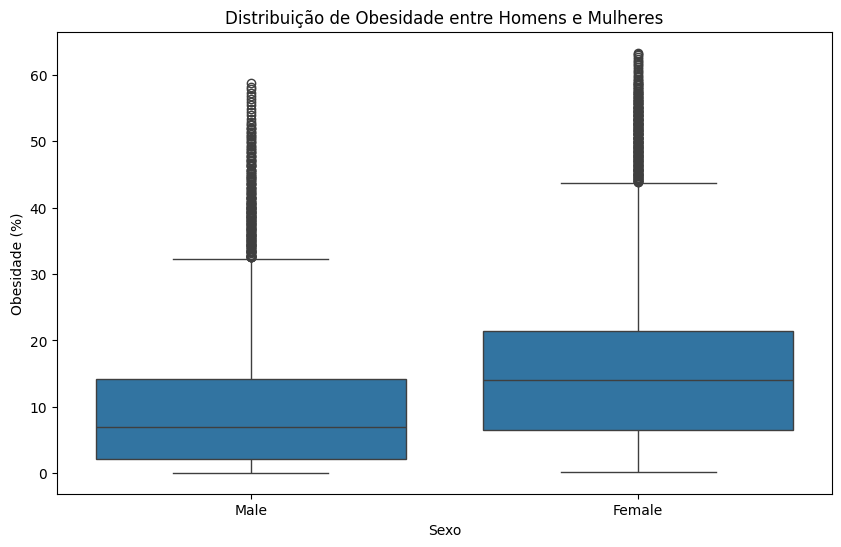

In [ ]:
# Vamos criar DataFrames para os dados de homens e mulheres
male_df = pd.DataFrame({
    'Sex': 'Male',
    'Obesity': male_df['Obesity']
})
female_df = pd.DataFrame({
    'Sex': 'Female',
    'Obesity': female_df['Obesity']
})

# Concatenar os DataFrames de homens e mulheres
combined_df = pd.concat([male_df, female_df])

# Plotar o boxplot usando Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='Obesity', data=combined_df)
plt.title('Distribuição de Obesidade entre Homens e Mulheres')
plt.xlabel('Sexo')
plt.ylabel('Obesidade (%)')
plt.show()

R: Percebe-se que os dados entre homens e mulhereres são diferentes. Há um maior percentual geral de mulheres obesas do que homens.

## Qual o percentual médio de obesidade por sexo na américa do norte no ano de 2010?

In [ ]:
df_obesidade_reorganizado['Country'].unique() #lista de países

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia

In [ ]:
exp_logica_america_norte = (df_obesidade_reorganizado['Country'] == 'United States of America') | \
                            (df_obesidade_reorganizado['Country'] == 'Canada') | \
                            (df_obesidade_reorganizado['Country'] == 'Mexico')
df_america_norte = df_obesidade_reorganizado[exp_logica_america_norte]
df_america_norte

,Country,Year,Obesity (%),Sex,Obesity
3906,Canada,1975,9.8 [7.2-13.0],Both sexes,9.8
3907,Canada,1975,8.8 [5.3-13.2],Male,8.8
3908,Canada,1975,10.8 [7.0-15.2],Female,10.8
3909,Canada,1976,10.1 [7.6-13.1],Both sexes,10.1
3910,Canada,1976,9.1 [5.7-13.3],Male,9.1
...,...,...,...,...,...
23557,United States of America,2015,34.7 [29.7-40.1],Male,34.7
23558,United States of America,2015,36.4 [31.3-41.4],Female,36.4
23559,United States of America,2016,36.2 [32.3-40.1],Both sexes,36.2
23560,United States of America,2016,35.5 [30.0-41.2],Male,35.5


In [ ]:
df_america_norte_2010 = df_america_norte[df_america_norte['Year'] == 2010]
df_america_norte_2010

,Country,Year,Obesity (%),Sex,Obesity
4011,Canada,2010,26.0 [23.2-28.9],Both sexes,26.0
4012,Canada,2010,25.8 [21.8-30.1],Male,25.8
4013,Canada,2010,26.2 [22.4-30.2],Female,26.2
13965,Mexico,2010,25.8 [23.1-28.6],Both sexes,25.8
13966,Mexico,2010,21.1 [17.5-25.0],Male,21.1
13967,Mexico,2010,29.8 [25.8-33.9],Female,29.8
23541,United States of America,2010,32.3 [29.6-35.1],Both sexes,32.3
23542,United States of America,2010,31.2 [27.4-35.3],Male,31.2
23543,United States of America,2010,33.3 [29.6-37.1],Female,33.3


In [ ]:
df_america_norte_2010_homens = df_america_norte_2010[df_america_norte_2010['Sex'] == 'Male']
df_america_norte_2010_homens

,Country,Year,Obesity (%),Sex,Obesity
4012,Canada,2010,25.8 [21.8-30.1],Male,25.8
13966,Mexico,2010,21.1 [17.5-25.0],Male,21.1
23542,United States of America,2010,31.2 [27.4-35.3],Male,31.2


In [ ]:
df_america_norte_2010_mulheres = df_america_norte_2010[df_america_norte_2010['Sex'] == 'Female']
df_america_norte_2010_mulheres

,Country,Year,Obesity (%),Sex,Obesity
4013,Canada,2010,26.2 [22.4-30.2],Female,26.2
13967,Mexico,2010,29.8 [25.8-33.9],Female,29.8
23543,United States of America,2010,33.3 [29.6-37.1],Female,33.3


In [ ]:
print('O percentual médio de homens obesos na América do Norte, em 2010, é {:.2f}%\n'.format(df_america_norte_2010_homens['Obesity'].mean()))
print('O percentual médio de mulheres obesas na América do Norte, em 2010, é {:.2f}%'.format(df_america_norte_2010_mulheres['Obesity'].mean()))

if abs(df_america_norte_2010_homens['Obesity'].mean() - df_america_norte_2010_mulheres['Obesity'].mean()) < 5:
  print('\nOs percentuais são próximos')
else:
  print('\nOs percentuais são distantes')


O percentual médio de homens obesos na América do Norte, em 2010, é 26.03%

O percentual médio de mulheres obesas na América do Norte, em 2010, é 29.77%

Os percentuais são próximos


## Qual os top 3 com maior e menor taxa de aumento de índices de obesidade nesse período de 2010? E em 2016?

Passos executados:

1. **Filtrar os dados para incluir apenas registros onde `Sex` é "Both Sexes"**.
2. **Calcular a diferença na obesidade (%) entre o primeiro e o último ano disponível para cada país**.
3. **Classificar os países com base nessa diferença**.
4. **Selecionar os top 3 países com o maior e menor aumento na obesidade (%)**.

In [ ]:
#Vizualização dos nomes das colunas
df_obesidade_reorganizado.columns

Index(['Country', 'Year', 'Obesity (%)', 'Sex', 'Obesity'], dtype='object')

In [ ]:
# Filtrar os dados para os anos de interesse e para "Both sexes"
df_filtered = df_obesidade_reorganizado[(df_obesidade_reorganizado['Year'].isin([2010, 2016])) & (df_obesidade_reorganizado['Sex'] == 'Both sexes')]

In [ ]:
# Pivotar os dados para ter as taxas de obesidade de 2010 e 2016 lado a lado
df_pivot = df_filtered.pivot_table(index=['Country', 'Sex'], columns='Year', values='Obesity').reset_index()
df_pivot = df_pivot.drop('Sex', axis = 1)
df_pivot

Year,Country,2010,2016
0,Afghanistan,4.0,5.5
1,Albania,18.2,21.7
2,Algeria,23.3,27.4
3,Andorra,24.4,25.6
4,Angola,6.2,8.2
...,...,...,...
186,Venezuela (Bolivarian Republic of),23.3,25.6
187,Viet Nam,1.4,2.1
188,Yemen,13.5,17.1
189,Zambia,6.3,8.1


In [ ]:
# Remover possíveis linhas com dados faltantes para os anos 2010 ou 2016
df_pivot.dropna(subset=[2010, 2016], inplace=True)

# Calcular a diferença na taxa de obesidade
df_pivot['Diff'] = df_pivot[2016] - df_pivot[2010]

df_pivot

Year,Country,2010,2016,Diff
0,Afghanistan,4.0,5.5,1.5
1,Albania,18.2,21.7,3.5
2,Algeria,23.3,27.4,4.1
3,Andorra,24.4,25.6,1.2
4,Angola,6.2,8.2,2.0
...,...,...,...,...
186,Venezuela (Bolivarian Republic of),23.3,25.6,2.3
187,Viet Nam,1.4,2.1,0.7
188,Yemen,13.5,17.1,3.6
189,Zambia,6.3,8.1,1.8


In [ ]:
# Identificar os top 3 países com maior aumento na taxa de obesidade
top_3_increase = df_pivot.nlargest(3, 'Diff')

# Identificar os top 3 países com maior redução na taxa de obesidade
top_3_decrease = df_pivot.nsmallest(3, 'Diff')

# Exibir os resultados
print("Top 3 países com maior aumento na taxa de obesidade entre 2010 e 2016:")
print(top_3_increase)

print("\nTop 3 países com maior redução na taxa de obesidade entre 2010 e 2016:")
print(top_3_decrease)

Top 3 países com maior aumento na taxa de obesidade entre 2010 e 2016:
Year             Country  2010  2016  Diff
74                 Haiti  17.7  22.7   5.0
125                 Niue  45.2  50.0   4.8
51    Dominican Republic  23.0  27.6   4.6

Top 3 países com maior redução na taxa de obesidade entre 2010 e 2016:
Year            Country  2010  2016  Diff
154           Singapore   5.4   6.1   0.7
187            Viet Nam   1.4   2.1   0.7
138   Republic of Korea   3.9   4.7   0.8


## E os top 3 com maior e menor taxa de aumento de índices de obesidade no período completo, até o último registro ?

In [ ]:
# Filtrar os dados para incluir apenas registros onde 'Sex' é "Both Sexes"
df_obesidade_both_sexes = df_obesidade_reorganizado[df_obesidade_reorganizado['Sex'] == 'Both sexes'].copy()

In [ ]:
# Verificar se há dados após filtragem e limpeza
print(f"Total de registros após filtragem: {len(df_obesidade_both_sexes)}")

Total de registros após filtragem: 8022


In [ ]:
# Remover registros com NaN em 'Obesity no interval'
df_obesidade_both_sexes = df_obesidade_both_sexes.dropna(subset=['Obesity'])

In [ ]:
# Obter o primeiro e o último ano para cada país
first_last_years = df_obesidade_both_sexes.groupby('Country')['Year'].agg(['min', 'max']).reset_index()

In [ ]:
# Mesclar com o dataframe original para obter as taxas de obesidade nos primeiros e últimos anos
first_year_data = pd.merge(df_obesidade_both_sexes, first_last_years[['Country', 'min']], left_on=['Country', 'Year'], right_on=['Country', 'min'])
last_year_data = pd.merge(df_obesidade_both_sexes, first_last_years[['Country', 'max']], left_on=['Country', 'Year'], right_on=['Country', 'max'])

In [ ]:
# Renomear colunas para facilitar a manipulação
first_year_data = first_year_data.rename(columns={'Obesity': 'Obesity First Year', 'min': 'First Year'})
last_year_data = last_year_data.rename(columns={'Obesity': 'Obesity Last Year', 'max': 'Last Year'})

In [ ]:
# Mesclar os dados de primeiro e último ano
combined_data = pd.merge(first_year_data[['Country', 'First Year', 'Obesity First Year']],
                         last_year_data[['Country', 'Last Year', 'Obesity Last Year']],
                         on='Country')

In [ ]:
# Calcular a diferença na obesidade
combined_data['Obesity Increase'] = combined_data['Obesity Last Year'] - combined_data['Obesity First Year']

In [ ]:
# Verificar os dados combinados
print(combined_data.head())

       Country  First Year  Obesity First Year  Last Year  Obesity Last Year  \
0  Afghanistan        1975                 0.5       2016                5.5   
1      Albania        1975                 6.5       2016               21.7   
2      Algeria        1975                 6.9       2016               27.4   
3      Andorra        1975                12.9       2016               25.6   
4       Angola        1975                 0.8       2016                8.2   

   Obesity Increase  
0               5.0  
1              15.2  
2              20.5  
3              12.7  
4               7.4  


In [ ]:
# Classificar os países com base no aumento da obesidade
combined_data = combined_data.sort_values(by='Obesity Increase', ascending=False)

In [ ]:
# Top 3 países com maior aumento
top_3_increase = combined_data.head(3)

# Top 3 países com menor aumento (ou maior diminuição)
top_3_decrease = combined_data.tail(3)

In [ ]:
print("Top 3 países com maior aumento de obesidade:")
print(top_3_increase[['Country', 'First Year', 'Last Year', 'Obesity First Year', 'Obesity Last Year', 'Obesity Increase']])

print("\nTop 3 países com menor aumento (ou maior diminuição) de obesidade:")
print(top_3_decrease[['Country', 'First Year', 'Last Year', 'Obesity First Year', 'Obesity Last Year', 'Obesity Increase']])

Top 3 países com maior aumento de obesidade:
      Country  First Year  Last Year  Obesity First Year  Obesity Last Year  \
176    Tuvalu        1975       2016                17.9               51.6   
125      Niue        1975       2016                18.9               50.0   
90   Kiribati        1975       2016                15.9               46.0   

     Obesity Increase  
176              33.7  
125              31.1  
90               30.1  

Top 3 países com menor aumento (ou maior diminuição) de obesidade:
       Country  First Year  Last Year  Obesity First Year  Obesity Last Year  \
86       Japan        1975       2016                 1.0                4.3   
154  Singapore        1975       2016                 3.0                6.1   
187   Viet Nam        1975       2016                 0.1                2.1   

     Obesity Increase  
86                3.3  
154               3.1  
187               2.0  


 O aumento significativo da obesidade nesses países pode ser atribuído à transição nutricional, onde houve uma mudança para uma dieta mais ocidentalizada, rica em alimentos processados, açúcares adicionados e gorduras saturadas.

## Extraia o máximo de informação possível sobre o Brasil. (O que julga ser importante sobre esse dataset? Use gráficos e apresente.)

In [ ]:
df_brasil = df_obesidade_reorganizado[df_obesidade_reorganizado['Country'] == 'Brazil']
print('Dados sobre o Brasil:\n\n{}'.format(df_brasil))

df_brasil_male = df_obesidade_reorganizado[(df_obesidade_reorganizado['Country'] == 'Brazil') & (df_obesidade_reorganizado['Sex'] == 'Male')] #Dados dos homens
df_brasil_female = df_obesidade_reorganizado[(df_obesidade_reorganizado['Country'] == 'Brazil') & (df_obesidade_reorganizado['Sex'] == 'Female')] #Dados das mulheres

Dados sobre o Brasil:

     Country  Year       Obesity (%)         Sex  Obesity
2898  Brazil  1975     5.2 [3.3-7.9]  Both sexes      5.2
2899  Brazil  1975     3.0 [1.4-5.7]        Male      3.0
2900  Brazil  1975    7.3 [4.0-12.0]      Female      7.3
2901  Brazil  1976     5.5 [3.5-8.1]  Both sexes      5.5
2902  Brazil  1976     3.2 [1.5-5.8]        Male      3.2
...      ...   ...               ...         ...      ...
3019  Brazil  2015  18.0 [13.9-22.6]        Male     18.0
3020  Brazil  2015  24.9 [20.3-29.8]      Female     24.9
3021  Brazil  2016  22.1 [18.7-25.7]  Both sexes     22.1
3022  Brazil  2016  18.5 [14.1-23.5]        Male     18.5
3023  Brazil  2016  25.4 [20.4-30.7]      Female     25.4

[126 rows x 5 columns]


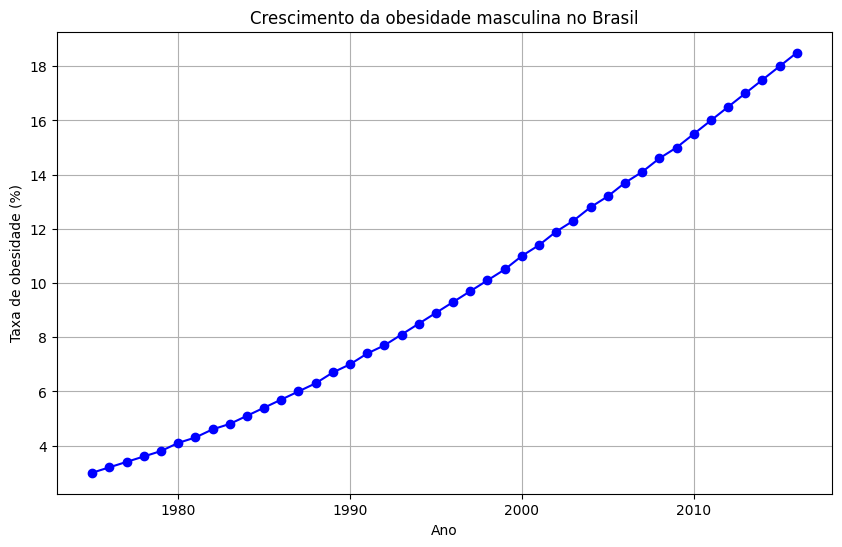

In [ ]:
## Plotando um gráfico sobre o crescimento da obesidade masculina no Brasil

# Ordenar os dados pelo ano
df_brasil_male = df_brasil_male.sort_values('Year')

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_brasil_male['Year'], df_brasil_male['Obesity'], marker='o', color='b')
plt.title('Crescimento da obesidade masculina no Brasil')
plt.xlabel('Ano')
plt.ylabel('Taxa de obesidade (%)')
plt.grid(True)
plt.show()

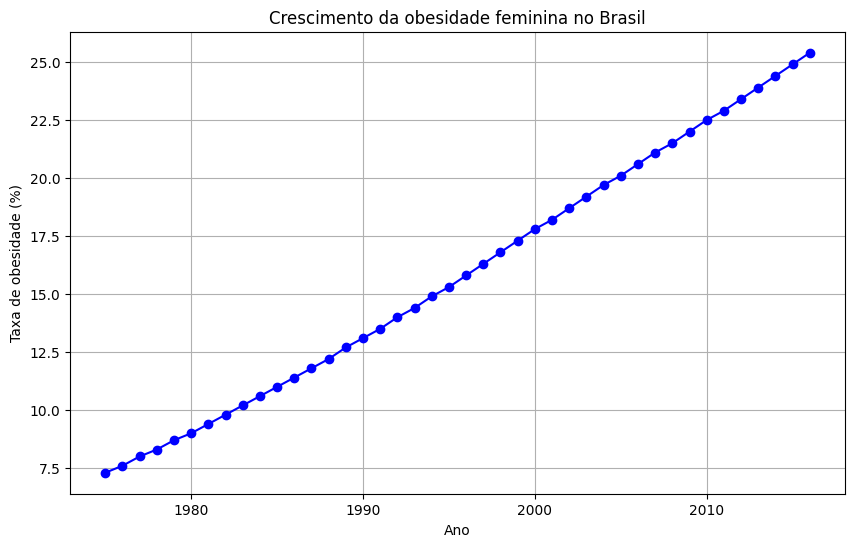

In [ ]:
## Plotando um gráfico sobre o crescimento da obesidade feminina no Brasil

# Ordenar os dados pelo ano
df_brasil_female = df_brasil_female.sort_values('Year')

# Plotar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(df_brasil_female['Year'], df_brasil_female['Obesity'], marker='o', color='b')
plt.title('Crescimento da obesidade feminina no Brasil')
plt.xlabel('Ano')
plt.ylabel('Taxa de obesidade (%)')
plt.grid(True)
plt.show()

In [ ]:
print('Alguns cálculos estatísticos sobre obesidade no Brasil:\n\n{}'.format(df_brasil['Obesity'].describe()))

Alguns cálculos estatísticos sobre obesidade no Brasil:

count    126.000000
mean      12.801587
std        5.705927
min        3.000000
25%        8.150000
50%       12.250000
75%       17.225000
max       25.400000
Name: Obesity, dtype: float64


### Comparar a obesidade no Brasil com o restante do mundo

Este código plota um gráfico comparativo das médias de obesidade ao longo do tempo para o Brasil em azul e para os outros países (excluindo o Brasil) em vermelho.

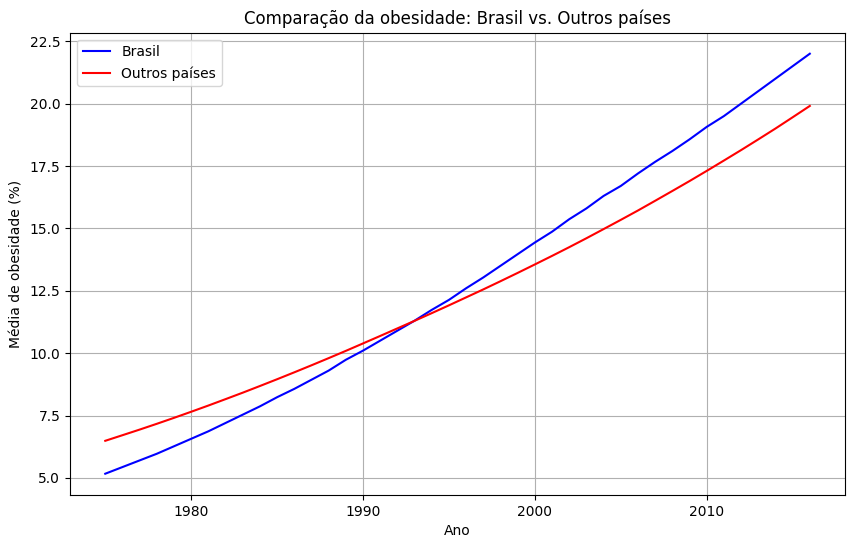

In [ ]:
# Calcular a média da obesidade para cada ano no Brasil
media_obesidade_brasil = df_brasil.groupby('Year')['Obesity'].mean()

# Filtrar os dados para incluir apenas os registros de outros países (excluindo o Brasil)
df_outros_paises = df_obesidade_reorganizado[df_obesidade_reorganizado['Country'] != 'Brazil']

# Calcular a média da obesidade para cada ano nos outros países
media_obesidade_outros_paises = df_outros_paises.groupby('Year')['Obesity'].mean()

# Plotar os gráficos comparativos das médias de obesidade ao longo do tempo
plt.figure(figsize=(10, 6))
plt.plot(media_obesidade_brasil.index, media_obesidade_brasil, label='Brasil', color='blue')
plt.plot(media_obesidade_outros_paises.index, media_obesidade_outros_paises, label='Outros países', color='red')
plt.title('Comparação da obesidade: Brasil vs. Outros países')
plt.xlabel('Ano')
plt.ylabel('Média de obesidade (%)')
plt.legend()
plt.grid(True)
plt.show()


Agora, há um interesse em saber quando o Brasil esteve abaixo da média mundial e acima da média mundial. O código a seguir visa resolver esse problema.

In [ ]:
# 1. Calcule a média mundial de obesidade para cada ano
media_obesidade_mundial = df_obesidade_reorganizado.groupby('Year')['Obesity'].mean()

# 2. Calcule a média de obesidade para o Brasil para cada ano
media_obesidade_brasil = df_brasil.groupby('Year')['Obesity'].mean()

# 3. Compare a média de obesidade do Brasil com a média mundial para cada ano
diferenca_obesidade = media_obesidade_brasil - media_obesidade_mundial

# 4. Identifique os anos em que a média de obesidade do Brasil está acima e abaixo da média mundial
anos_acima_media = diferenca_obesidade[diferenca_obesidade > 0].index
anos_abaixo_media = diferenca_obesidade[diferenca_obesidade < 0].index

# 5. Encontre o intervalo de anos em que o Brasil está acima e abaixo da média mundial
intervalo_acima_media = (anos_acima_media.min(), anos_acima_media.max())
intervalo_abaixo_media = (anos_abaixo_media.min(), anos_abaixo_media.max())

print("Intervalo em que o Brasil está acima da média mundial de obesidade:", intervalo_acima_media)
print("Intervalo em que o Brasil está abaixo da média mundial de obesidade:", intervalo_abaixo_media)


Intervalo em que o Brasil está acima da média mundial de obesidade: (1993, 2016)
Intervalo em que o Brasil está abaixo da média mundial de obesidade: (1975, 1992)


### Um aspecto adicional: previsão para obesos em 2023 usando regressão linear.

In [ ]:
# Dados históricos de obesidade no Brasil
anos_hist = np.array(df_brasil['Year']).reshape(-1, 1)  # Anos como matriz de uma coluna
obesidade_hist = np.array(df_brasil['Obesity'])  # Taxa de obesidade

# Ajustar um modelo de regressão linear aos dados históricos
modelo = LinearRegression()
modelo.fit(anos_hist, obesidade_hist)

# Prever a taxa de obesidade em 2024
obesidade_2023 = modelo.predict([[2023]])

print("Estimativa de % obesidade no Brasil em 2023:", obesidade_2023[0])

Estimativa de % obesidade no Brasil em 2023: 24.29850813458313


Gráfico tirado do Ministério da saúde com os dados

![Obesidade no Brasil](https://raw.githubusercontent.com/eng-joaoelias/AnaliseDadosBigData/main/DataSetADBD/obesos_brasil_grafico.jpeg)

Fonte: https://oglobo.globo.com/saude/noticia/2024/03/04/dia-mundial-da-obesidade-1-a-cada-4-adultos-no-brasil-e-obeso-veja-o-ranking-das-capitais.ghtml

In [ ]:
#Calculando o erro absoluto da previsão

err_abs = round(abs(obesidade_2023[0] - 24.3), 2)
print('Erro absoluto na previsão do modelo: {}%'.format(err_abs))

Erro absoluto na previsão do modelo: 0.0%


### Comparação entre a obesidade masculina e feminina
Nesta secção, será revelado o quanto a obesidade média masculina representa, no Brasil, em relação a feminina

In [ ]:
media_obesidade_geral_masc_br = df_brasil_male['Obesity'].mean()
media_obesidade_geral_fem_br = df_brasil_female['Obesity'].mean()
media_relativa_masc_fem = media_obesidade_geral_masc_br / media_obesidade_geral_fem_br
if media_relativa_masc_fem < 1:
  print('No geral, os homens são menos obesos que as mulheres. Representam {}% da média de mulheres.'.format(100*round(media_relativa_masc_fem, 4)))
else:
  print('No geral, os homens são mais obesos que as mulheres. Representam {}% da média de homens.'.format(100*round(media_relativa_masc_fem, 4)))

No geral, os homens são menos obesos que as mulheres. Representam 61.019999999999996% da média de mulheres.


### Diferenças de Gênero
Aqui, será mostrada a prevalência da obesidade entre homens e mulheres ao longo dos anos. Isso pode revelar se há diferenças significativas na tendência de obesidade entre os gêneros.

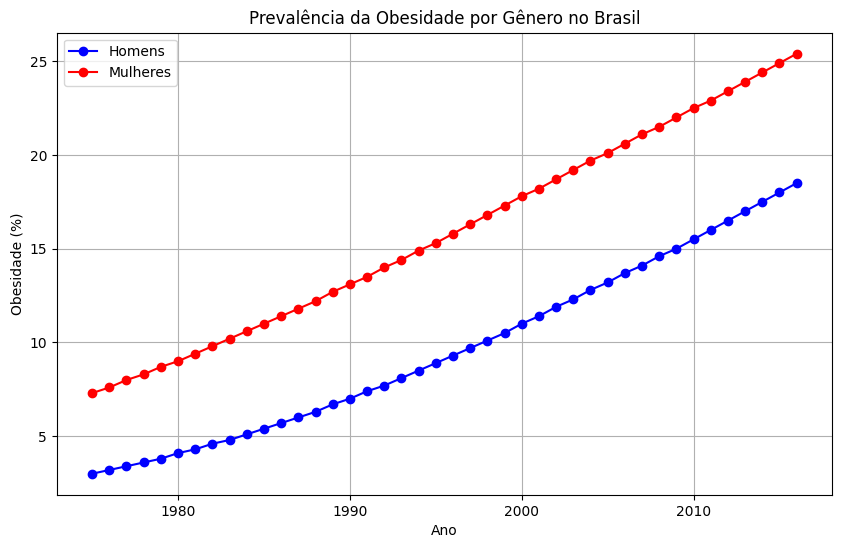

In [ ]:
# Plotar gráficos de obesidade por gênero
plt.figure(figsize=(10, 6))
plt.plot(df_brasil_male['Year'], df_brasil_male['Obesity'], marker='o', color='blue', label='Homens')
plt.plot(df_brasil_female['Year'], df_brasil_female['Obesity'], marker='o', color='red', label='Mulheres')
plt.title('Prevalência da Obesidade por Gênero no Brasil')
plt.xlabel('Ano')
plt.ylabel('Obesidade (%)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calcular a diferença de obesidade entre homens e mulheres para cada ano
df_diferencas = pd.DataFrame()
df_diferencas['Year'] = df_brasil_male['Year']  # Definir os anos como a primeira coluna

# Calcular a diferença de obesidade masculina e feminina para cada ano
df_diferencas['Diferenca_obesidade'] = df_brasil_female['Obesity'].values - df_brasil_male['Obesity'].values

# Contar os casos onde o percentual de obesidade feminina ultrapassa a masculina
casos_positivos = (df_diferencas['Diferenca_obesidade'] > 0).sum()

porcentagem_a_comparar = 50

if 100*(casos_positivos / len(df_diferencas.index)) > porcentagem_a_comparar:
  print('Há mais mulheres obesas do que homens.')
else:
  print('Há mais homens obesos do que mulheres.')

Há mais mulheres obesas do que homens.


#### Prever a tendência de comportamento da obesidade para os próximos 10 anos

##### O que é ARIMA no Python?

ARIMA, sigla para AutoRegressive Integrated Moving Average, é um método estatístico popular para **previsão de séries temporais** no Python. Ele se destaca por sua capacidade de lidar com diversos padrões temporais presentes em dados de séries temporais.

**Funcionamento:**

O ARIMA combina três componentes principais:

* **Autorregressão (AR):** Captura a dependência de valores atuais em relação a valores passados da série temporal.
* **Média móvel (MA):** Considera a média de erros passados para prever valores futuros.
* **Diferenciação (I):** Transforma a série original para torná-la estacionária, ou seja, com média e variância constantes ao longo do tempo.

**Parâmetros:**

Um modelo ARIMA é definido por três parâmetros:

* **p:** Ordem da autorregressão (AR).
* **d:** Ordem da diferenciação (I).
* **q:** Ordem da média móvel (MA).

1. **Função `forecast_obesity`**:
   - Recebe um DataFrame com os dados de obesidade e o número de anos a serem previstos (`steps`).
   - Ajusta um modelo ARIMA aos dados de obesidade.
   - Realiza a previsão para os próximos `steps` anos.
   - Retorna a previsão e os anos correspondentes à previsão.

In [ ]:
# Função para fazer a previsão
def forecast_obesity(df, steps=10):
    # Definir o índice como o ano
    df.set_index('Year', inplace=True)

    # Ajustar o modelo ARIMA
    model = ARIMA(df['Obesity'], order=(5, 1, 0))
    model_fit = model.fit()

    # Fazer a previsão
    forecast = model_fit.forecast(steps=steps)
    forecast_index = np.arange(df.index.max() + 1, df.index.max() + 1 + steps)

    # Resetar o índice
    df.reset_index(inplace=True)

    return forecast, forecast_index

2. **Função `plot_combined_forecast`**:
   - Função criada para plotar os dados históricos e as previsões para homens e mulheres no mesmo gráfico.
   - Utiliza diferentes cores e estilos de linha para distinguir entre homens e mulheres.

In [ ]:
# Função para plotar os dados históricos e a previsão
def plot_combined_forecast(df_male, forecast_male, forecast_index_male, df_female, forecast_female, forecast_index_female, title):
    plt.figure(figsize=(12, 6))
    plt.plot(df_male['Year'], df_male['Obesity'], label='Dados Históricos (Homems)')
    plt.plot(forecast_index_male, forecast_male, label='Previsão (Homens)', color='blue', linestyle='--')
    plt.plot(df_female['Year'], df_female['Obesity'], label='Dados Históricos (Mulheres)')
    plt.plot(forecast_index_female, forecast_female, label='Previsão (Mulheres)', color='red', linestyle='--')
    plt.title(title)
    plt.xlabel('Ano')
    plt.ylabel('Obesidade (%)')
    plt.legend()
    plt.show()

- **Modelo ARIMA**: O modelo ARIMA é um modelo popular para séries temporais que lida com autocorrelação nos dados. Ajustamos um modelo ARIMA (5, 1, 0), onde `5` é a ordem da parte autoregressiva, `1` é a ordem de diferenciação e `0` é a ordem da média móvel.
- **Ajuste do Modelo**: O código ajusta um modelo ARIMA com parâmetros fixos. Para melhorar a precisão, você pode ajustar os parâmetros com base nos dados específicos.
- **Previsão e Visualização**: Os gráficos mostram tanto os dados históricos quanto as previsões, facilitando a visualização das tendências futuras.

In [ ]:
# Realizar a previsão para homens
forecast_male, forecast_index_male = forecast_obesity(df_brasil_male)

# Realizar a previsão para mulheres
forecast_female, forecast_index_female = forecast_obesity(df_brasil_female)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Che

In [ ]:
# Criar DataFrames com os dados previstos
'''
Depois de realizar a previsão para homens e mulheres, criamos
dois DataFrames (forecast_male_df e forecast_female_df) que
contêm os anos previstos e os valores de obesidade previstos.
'''
forecast_male_df = pd.DataFrame({'Year': forecast_index_male, 'Obesity': forecast_male})
forecast_female_df = pd.DataFrame({'Year': forecast_index_female, 'Obesity': forecast_female})

# Mostrar os valores previstos
print("Previsão de obesidade para homens no Brasil:")
print(forecast_male_df)

print("\nPrevisão de obesidade para mulheres no Brasil:")
print(forecast_female_df)

Previsão de obesidade para homens no Brasil:
    Year    Obesity
42  2017  18.998577
43  2018  19.496967
44  2019  19.994065
45  2020  20.490838
46  2021  20.986570
47  2022  21.481779
48  2023  21.976116
49  2024  22.469799
50  2025  22.962707
51  2026  23.454898

Previsão de obesidade para mulheres no Brasil:
    Year    Obesity
42  2017  25.899181
43  2018  26.398449
44  2019  26.897406
45  2020  27.396110
46  2021  27.894511
47  2022  28.392721
48  2023  28.890651
49  2024  29.388332
50  2025  29.885759
51  2026  30.382941


3. **Exibir Previsões e Plotar Gráfico Combinado**:
   - Exibe os valores previstos.
   - Utiliza a função `plot_combined_forecast` para plotar os dados históricos e as previsões no mesmo gráfico.

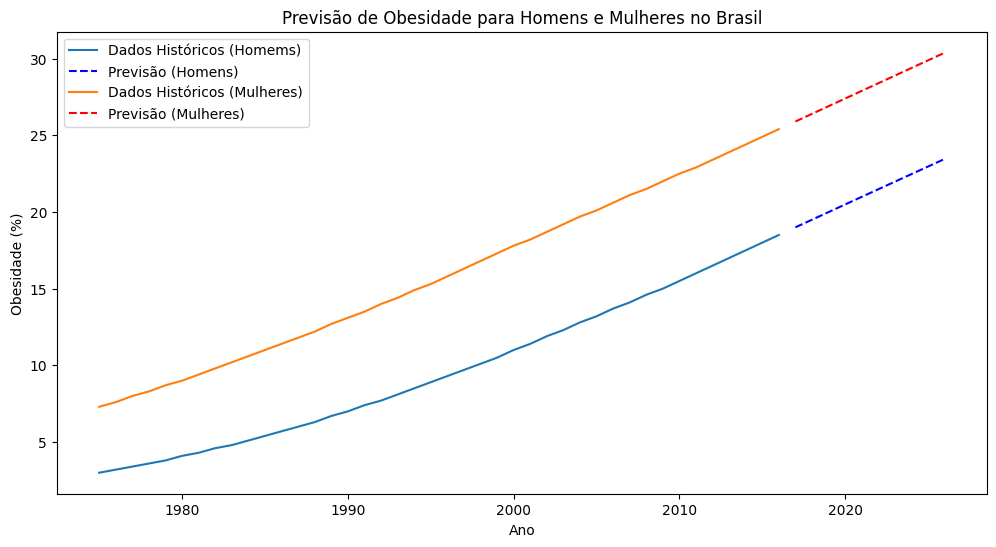

In [ ]:
# Plotar os resultados combinados
plot_combined_forecast(df_brasil_male, forecast_male, forecast_index_male, df_brasil_female, forecast_female, forecast_index_female, 'Previsão de Obesidade para Homens e Mulheres no Brasil')

#Sobre PIB Per Capita

## Abrindo o DataSet PIB Per Capita

In [ ]:
#df_pib_per_capita = pd.read_csv('/content/drive/MyDrive/DataSetADBD/PIB-Per-Capita.csv', sep = ',')
df_pib_per_capita = pd.read_csv('https://raw.githubusercontent.com/eng-joaoelias/AnaliseDadosBigData/main/DataSetADBD/PIB-Per-Capita.csv', sep = ',')
df_pib_per_capita

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


## Limpeza de dados

In [ ]:
df_pib_per_capita['Year'].dtype

dtype('O')

In [ ]:
# Extrair apenas o ano da coluna 'Year' e converter para int
df_pib_per_capita['Year'] = df_pib_per_capita['Year'].str.extract('(\d{4})').astype(int)

In [ ]:
df_pib_per_capita

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


In [ ]:
#Remover os registros anteriores a 1975
df_pib_per_capita = df_pib_per_capita.query('Year >= 1975')

In [ ]:
df_pib_per_capita

,Country,Region,Year,GDP_pp
15,Afghanistan,"Middle East, North Africa, and Greater Arabia",1976,866.19
16,Afghanistan,"Middle East, North Africa, and Greater Arabia",1981,896.86
17,Afghanistan,"Middle East, North Africa, and Greater Arabia",1986,"1,030.89"
18,Afghanistan,"Middle East, North Africa, and Greater Arabia",1991,705.45
19,Afghanistan,"Middle East, North Africa, and Greater Arabia",1996,617.91
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


## Os dados estão separados de 5 em 5 anos. Adapte preenchendo os anos vazios.
>Dica: faça uma média entre um valor e outro, dívida por 5, e interpole esses valores.

In [ ]:
print(df_pib_per_capita.columns) #Inicialmente, ver quais sao as colunas

Index(['Country', 'Region', 'Year', ' GDP_pp '], dtype='object')


In [ ]:
df_pib_per_capita[' GDP_pp '].dtype #Precisamos converter a coluna do valor do PIB per capita em float

dtype('O')

In [ ]:
# Garantir que a coluna ' GDP_pp ' esteja no formato float
df_pib_per_capita[' GDP_pp '] = df_pib_per_capita[' GDP_pp '].str.replace(',', '').astype(float)

<ipython-input-68-76c92903c25a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pib_per_capita[' GDP_pp '] = df_pib_per_capita[' GDP_pp '].str.replace(',', '').astype(float)


In [ ]:
# Função para interpolar valores de PIB per capita e preencher anos ausentes
def interpolate_gdp(group):
    # Criar um DataFrame com todos os anos no intervalo desejado
    all_years = pd.DataFrame({'Year': range(group['Year'].min(), 2017)})
    # Fazer o merge com os dados do grupo para garantir todos os anos
    group = pd.merge(all_years, group, how='left', on='Year')
    # Preencher colunas 'Country' e 'Region' com valores corretos
    group['Country'] = group['Country'].fillna(method='ffill').fillna(method='bfill')
    group['Region'] = group['Region'].fillna(method='ffill').fillna(method='bfill')
    # Preencher os valores ausentes usando interpolação linear
    group[' GDP_pp '] = group[' GDP_pp '].interpolate(method='linear')
    return group

In [ ]:
# Aplicar a interpolação para cada país
df_pib_per_capita = df_pib_per_capita.groupby('Country').apply(interpolate_gdp).reset_index(drop=True)

In [ ]:
df_pib_per_capita

,Year,Country,Region,GDP_pp
0,1976,Afghanistan,"Middle East, North Africa, and Greater Arabia",866.190
1,1977,Afghanistan,"Middle East, North Africa, and Greater Arabia",872.324
2,1978,Afghanistan,"Middle East, North Africa, and Greater Arabia",878.458
3,1979,Afghanistan,"Middle East, North Africa, and Greater Arabia",884.592
4,1980,Afghanistan,"Middle East, North Africa, and Greater Arabia",890.726
...,...,...,...,...
7893,2012,Zimbabwe,Sub-Saharan Africa,526.330
7894,2013,Zimbabwe,Sub-Saharan Africa,526.330
7895,2014,Zimbabwe,Sub-Saharan Africa,526.330
7896,2015,Zimbabwe,Sub-Saharan Africa,526.330


In [ ]:
#Se os dados de entrada não tiverem valores diferentes para interpolar, a interpolação linear não poderá produzir novos valores.
df_pib_per_capita[(df_pib_per_capita['Country'] == 'Brazil') & (df_pib_per_capita['Year'] >= 2010)]

,Year,Country,Region,GDP_pp
977,2010,Brazil,South America,10074.942
978,2011,Brazil,South America,10383.070
979,2012,Brazil,South America,10383.070
980,2013,Brazil,South America,10383.070
981,2014,Brazil,South America,10383.070
982,2015,Brazil,South America,10383.070
983,2016,Brazil,South America,10383.070


### Plot um gráfico

Países ordenados em ordem descescente por PIB

In [ ]:
mean_gdp_per_capita = df_pib_per_capita.groupby('Country')[' GDP_pp '].mean()
mean_gdp_per_capita = mean_gdp_per_capita.reset_index()
mean_gdp_per_capita.sort_values(by=' GDP_pp ', ascending=False)

,Country,GDP_pp
97,Liechtenstein,67033.523659
138,Qatar,62766.688293
24,Brunei,51972.900488
99,Luxembourg,50982.777805
89,Kuwait,39566.390488
...,...,...
53,Ethiopia,623.255610
51,Eritrea,621.151951
117,Mozambique,616.214390
95,Liberia,549.204390


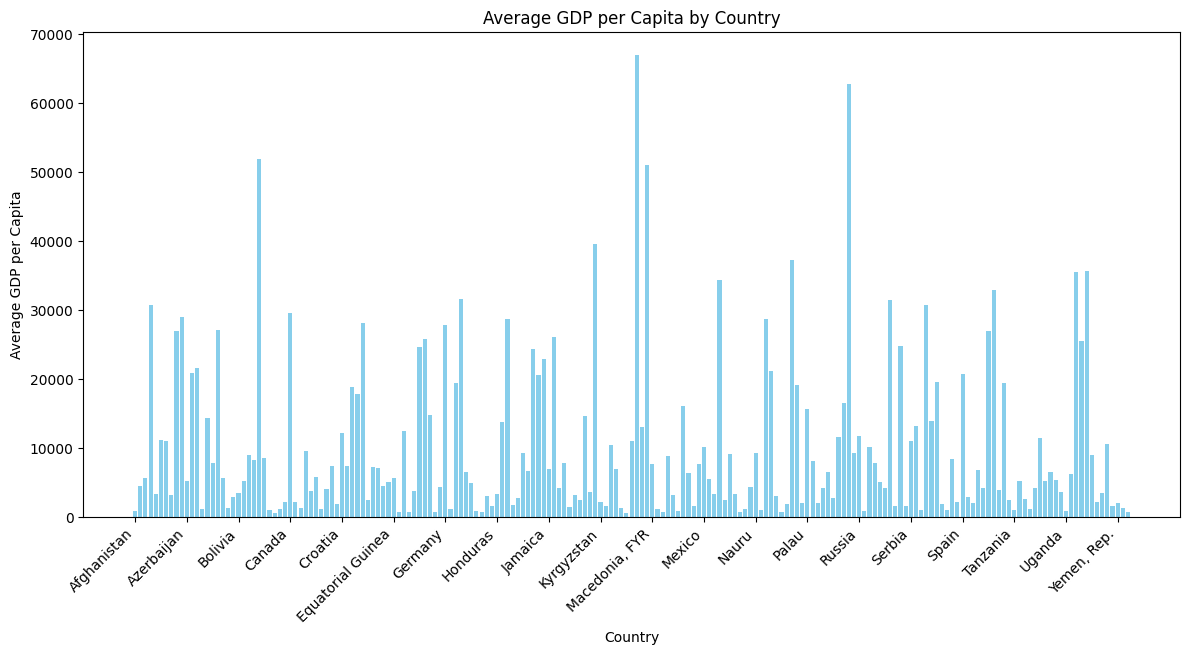

In [ ]:
# Calcular a média do PIB per capita para cada país
mean_gdp_per_capita = df_pib_per_capita.groupby('Country')[' GDP_pp '].mean()

# Resetar o índice para transformar 'Country' em uma coluna
mean_gdp_per_capita = mean_gdp_per_capita.reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
bars = plt.bar(mean_gdp_per_capita['Country'], mean_gdp_per_capita[' GDP_pp '], color='skyblue')

plt.xlabel('Country')
plt.ylabel('Average GDP per Capita')
plt.title('Average GDP per Capita by Country')

plt.xticks(rotation=90)  # Rotacionar os rótulos dos países para melhor visualização
plt.tight_layout()  # Ajustar o layout para evitar cortes nos nomes dos países

# Ajustar os rótulos dos países de forma escalonada
plt.gca().set_xticks(mean_gdp_per_capita['Country'][::10])
plt.gca().set_xticklabels(mean_gdp_per_capita['Country'][::10], rotation=45, ha='right')

plt.show()

Exibição dos rótulos dos países de forma escalonada, exibindo apenas cada décimo país. Isso ajuda a evitar a sobreposição de rótulos e melhora a legibilidade do gráfico.

### Informe as regiões de maiores crescimentos de PIB. Use gráficos para finalizar a resposta.

In [ ]:
df_pib_per_capita['Region'].value_counts() #Exibindo quais são as regiões do PIB per capita.

Region
Europe                                           1912
Sub-Saharan Africa                               1886
Asia                                             1107
Middle East, North Africa, and Greater Arabia     943
Central America and the Caribbean                 779
Australia and Oceania                             615
South America                                     492
North America                                     164
Name: count, dtype: int64

1. **Calcular a variação do PIB per capita por região ao longo do tempo**: Para isso, precisamos agrupar os dados por região e ano, calcular a média do PIB per capita por ano para cada região e, em seguida, calcular a variação do PIB per capita ao longo do tempo.
2. **Identificar as regiões com maiores crescimentos**: Com a variação calculada, podemos identificar as regiões com os maiores crescimentos.

In [ ]:
# Calcular a média do PIB per capita por ano para cada região
df_mean_gdp = df_pib_per_capita.groupby(['Region', 'Year'])[' GDP_pp '].mean().reset_index()

In [ ]:
# Pivotar os dados para ter os anos como colunas e as regiões como linhas
df_pivot = df_mean_gdp.pivot(index='Region', columns='Year', values=' GDP_pp ')

In [ ]:
# Calcular a variação percentual do PIB per capita
growth = df_pivot.pct_change(axis='columns') * 100

# Calcular a média da variação percentual ao longo dos anos para cada região
average_growth = growth.mean(axis=1)

# Identificar as regiões com maiores crescimentos
top_regions = average_growth.sort_values(ascending=False)

In [ ]:
print("Crescimento médio anual de cada região\n", top_regions)

Crescimento médio anual de cada região
 Region
Asia                                             1.603935
Central America and the Caribbean                1.518511
Europe                                           1.412699
North America                                    1.306317
South America                                    1.108828
Sub-Saharan Africa                               0.865405
Australia and Oceania                            0.192678
Middle East, North Africa, and Greater Arabia    0.040945
dtype: float64


In [ ]:
# Encontrar o primeiro e o último ano do DataFrame
first_year = df_pib_per_capita['Year'].min()
last_year = df_pib_per_capita['Year'].max()

# Filtrar os dados para o primeiro e o último ano
df_first_year = df_pib_per_capita[df_pib_per_capita['Year'] == first_year]
df_last_year = df_pib_per_capita[df_pib_per_capita['Year'] == last_year]

# Calcular a média do PIB per capita no primeiro e no último ano para cada região
gdp_first_year = df_first_year.groupby('Region')[' GDP_pp '].mean()
gdp_last_year = df_last_year.groupby('Region')[' GDP_pp '].mean()

# Calcular o crescimento percentual geral
growth_general = ((gdp_last_year - gdp_first_year) / gdp_first_year) * 100

# Ordenar as regiões pelo crescimento percentual geral
growth_general_sorted = growth_general.sort_values(ascending=False)

print("Crescimento geral das regiões:\n", growth_general_sorted)

Crescimento geral das regiões:
 Region
Asia                                             88.593391
Central America and the Caribbean                82.268357
Europe                                           74.764214
North America                                    67.677984
South America                                    54.625550
Sub-Saharan Africa                               40.614277
Australia and Oceania                             7.482835
Middle East, North Africa, and Greater Arabia     0.383376
Name:  GDP_pp , dtype: float64


#### Gráfico para mostrar o crescimento/descrescimento do PIB *per capita* de cada região

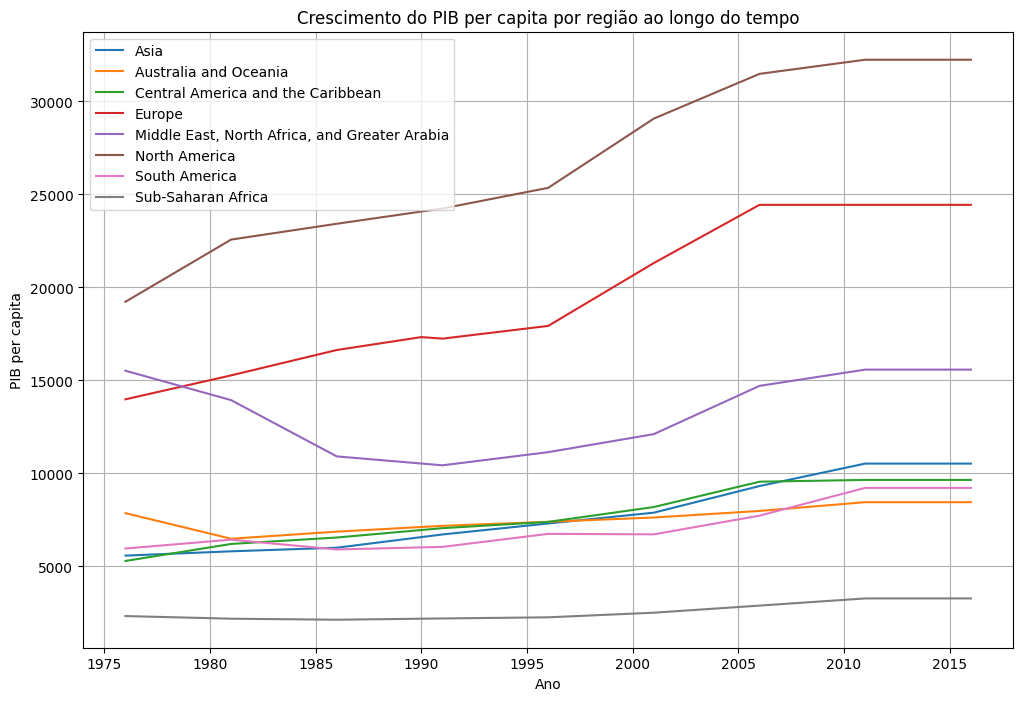

In [ ]:
# Plotar o gráfico
plt.figure(figsize=(12, 8))
for region in df_mean_gdp['Region'].unique():
    region_data = df_mean_gdp[df_mean_gdp['Region'] == region]
    plt.plot(region_data['Year'], region_data[' GDP_pp '], label=region)

plt.title('Crescimento do PIB per capita por região ao longo do tempo')
plt.xlabel('Ano')
plt.ylabel('PIB per capita')
plt.legend()
plt.grid(True)
plt.show()

## Quanto mais rico, mais obeso?

Primeiramente, os países estão com grafias distintas

In [ ]:
df_obesidade_reorganizado['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire",
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia

In [ ]:
df_pib_per_capita['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Rep.',
       'Denmark', 'Djibouti', 'Dominica', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Grenada',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran'

Devemos criar um dicionário de mapeamento para mapear as grafias dos países de um dataset para o outro.


In [ ]:
# Dicionário de mapeamento
country_mapping = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Cape Verde': 'Cabo Verde',
    'Czechia': 'Czech Rep.',
    "Democratic People's Republic of Korea": 'Korea, Dem. Rep.',
    'Republic of Korea': 'Korea, Rep.',
    "Côte d'Ivoire": "Cote d'Ivoire",
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'United States of America': 'United States',
    'Venezuela (Bolivarian Republic of)': 'Venezuela',
    'Viet Nam': 'Vietnam',
    'Syrian Arab Republic': 'Syria',
    'Iran (Islamic Republic of)': 'Iran'
}


2. Substituição dos Nomes dos Países

In [ ]:
# Substituir os nomes dos países no dataset de obesidade
df_obesidade_reorganizado['Country'] = df_obesidade_reorganizado['Country'].replace(country_mapping)

# Substituir os nomes dos países no dataset de PIB per capita (se necessário)
df_pib_per_capita['Country'] = df_pib_per_capita['Country'].replace(country_mapping)

<ipython-input-85-531c02f42781>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_obesidade_reorganizado['Country'] = df_obesidade_reorganizado['Country'].replace(country_mapping)


3. Filtragem e Mesclagem dos Dados

In [ ]:
# Filtrar o dataframe de obesidade para incluir apenas 'Both Sexes'
df_obesidade_both_sexes = df_obesidade_reorganizado[df_obesidade_reorganizado['Sex'] == 'Both sexes']

# Selecionar as colunas desejadas dos dataframes
df_obesidade_filtered = df_obesidade_both_sexes[['Country', 'Year', 'Obesity']]
df_pib_filtered = df_pib_per_capita[['Country', 'Year', 'Region', ' GDP_pp ']]

# Mesclar os dataframes com base nas colunas 'Country' e 'Year'
df_combined = pd.merge(df_obesidade_filtered, df_pib_filtered, on=['Country', 'Year'], how='inner')

In [ ]:
df_combined

,Country,Year,Obesity,Region,GDP_pp
0,Afghanistan,1976,0.5,"Middle East, North Africa, and Greater Arabia",866.190
1,Afghanistan,1977,0.6,"Middle East, North Africa, and Greater Arabia",872.324
2,Afghanistan,1978,0.6,"Middle East, North Africa, and Greater Arabia",878.458
3,Afghanistan,1979,0.6,"Middle East, North Africa, and Greater Arabia",884.592
4,Afghanistan,1980,0.7,"Middle East, North Africa, and Greater Arabia",890.726
...,...,...,...,...,...
7129,Zimbabwe,2012,14.3,Sub-Saharan Africa,526.330
7130,Zimbabwe,2013,14.6,Sub-Saharan Africa,526.330
7131,Zimbabwe,2014,14.9,Sub-Saharan Africa,526.330
7132,Zimbabwe,2015,15.2,Sub-Saharan Africa,526.330


In [ ]:
# Calcular a média do PIB per capita e obesidade por região ou país
mean_data = df_combined.groupby(['Region', 'Country']).mean()

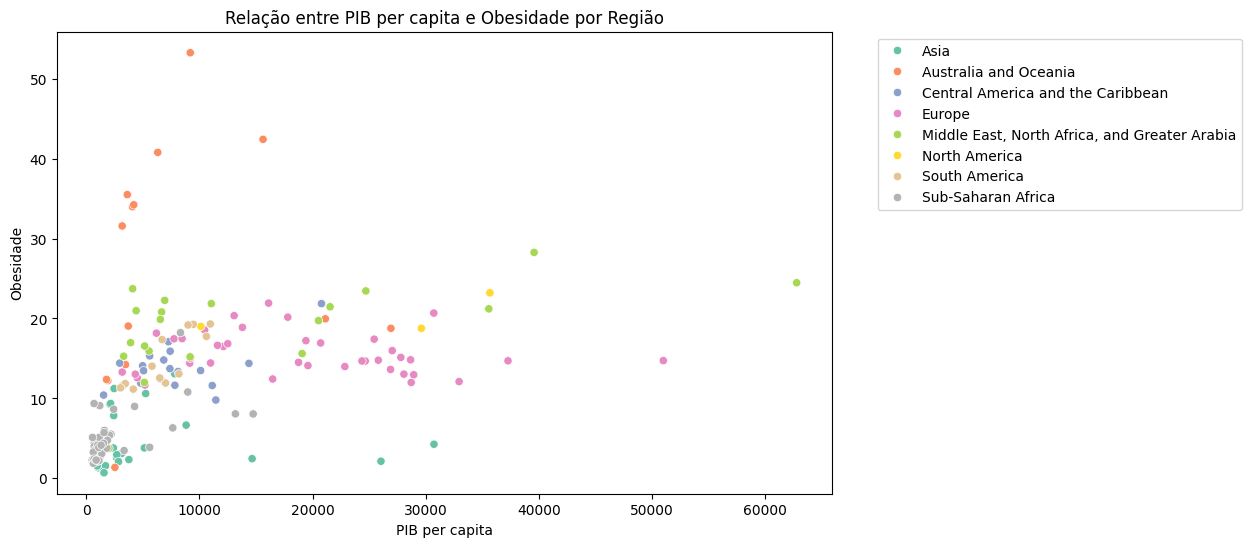

In [ ]:
# Plotar um gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(data=mean_data, x=' GDP_pp ', y='Obesity', hue='Region', palette='Set2')
plt.xlabel('PIB per capita')
plt.ylabel('Obesidade')
plt.title('Relação entre PIB per capita e Obesidade por Região')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [ ]:
# Calcular a correlação entre PIB per capita e obesidade
correlation = mean_data[' GDP_pp '].corr(mean_data['Obesity'])
print("Correlação entre PIB per capita e obesidade:", correlation)

Correlação entre PIB per capita e obesidade: 0.38801423266162666


Uma correlação de 0.388 sugere uma correlação positiva moderada entre o PIB per capita e a obesidade. Isso significa que há uma tendência de que países com um PIB per capita mais alto também tenham níveis mais altos de obesidade. No entanto, a correlação não é muito forte, o que significa que outros fatores também podem influenciar os níveis de obesidade em um país. Portanto, podemos dizer que a afirmação "Quanto mais rico, mais obeso" tem algum suporte com base nos dados, mas a relação não é tão forte e outros fatores também devem ser considerados.

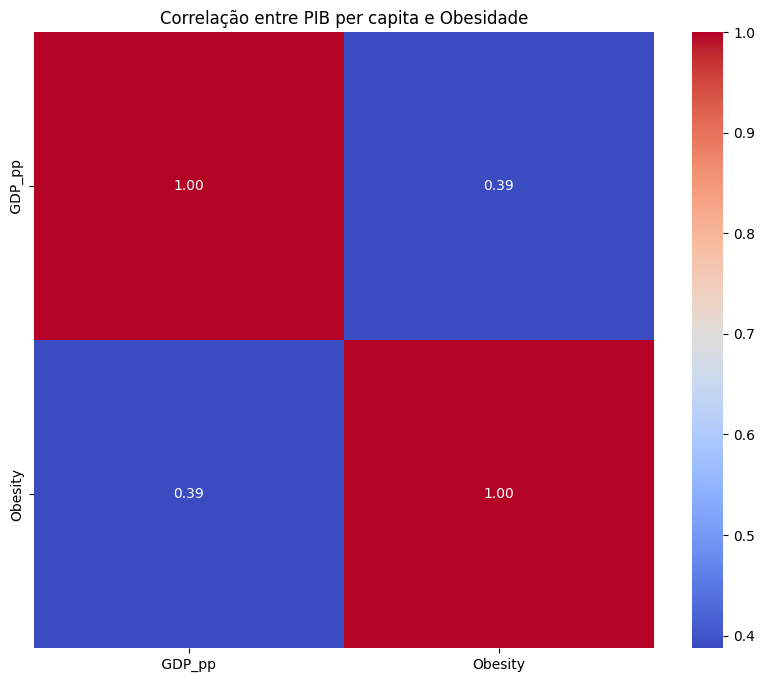

In [ ]:
# Gráfico de calor com a correlação entre PIB per capita e obesidade
plt.figure(figsize=(10, 8))
sns.heatmap(df_combined[[' GDP_pp ', 'Obesity']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre PIB per capita e Obesidade')
plt.show()

## O resultado em 1 é o mesmo no Brasil? Qual a diferença entre Brasil, USA e Portugal?

In [ ]:
# Filtrar os dados para Brasil, USA e Portugal
countries_of_interest = ['Brazil', 'United States', 'Portugal']
df_filtered = df_combined[df_combined['Country'].isin(countries_of_interest)]

In [ ]:
# Função para calcular a correlação entre PIB per capita e obesidade para um país específico
def calculate_correlation(df, country):
    df_country = df[df['Country'] == country]
    correlation = df_country[' GDP_pp '].corr(df_country['Obesity'])
    return correlation

In [ ]:
# Calcular a correlação para Brasil, EUA e Portugal
correlation_brazil = calculate_correlation(df_filtered, 'Brazil')
correlation_usa = calculate_correlation(df_filtered, 'United States')
correlation_portugal = calculate_correlation(df_filtered, 'Portugal')

# Exibir os resultados
print(f"Correlação entre PIB per capita e obesidade no Brasil: {correlation_brazil}")
print(f"Correlação entre PIB per capita e obesidade nos EUA: {correlation_usa}")
print(f"Correlação entre PIB per capita e obesidade em Portugal: {correlation_portugal}")

Correlação entre PIB per capita e obesidade no Brasil: 0.9450864435203971
Correlação entre PIB per capita e obesidade nos EUA: 0.9689349149588301
Correlação entre PIB per capita e obesidade em Portugal: 0.9373921887608112


In [ ]:
# Analisar os resultados
differences = {
    "Brasil vs EUA": correlation_brazil - correlation_usa,
    "Brasil vs Portugal": correlation_brazil - correlation_portugal,
    "EUA vs Portugal": correlation_usa - correlation_portugal
}

print("Diferenças de correlação:")
for comparison, difference in differences.items():
    print(f"{comparison}: {difference}")

Diferenças de correlação:
Brasil vs EUA: -0.02384847143843305
Brasil vs Portugal: 0.00769425475958585
EUA vs Portugal: 0.0315427261980189


1.   A relação entre PIB per capita e obesidade é ligeiramente mais forte nos EUA do que no Brasil.
2.   A relação entre PIB per capita e obesidade é ligeiramente mais forte no Brasil do que em Portugal, mas a diferença é muito pequena.
3.   A relação entre PIB per capita e obesidade é um pouco mais forte nos EUA do que em Portugal.





<Figure size 1000x600 with 0 Axes>

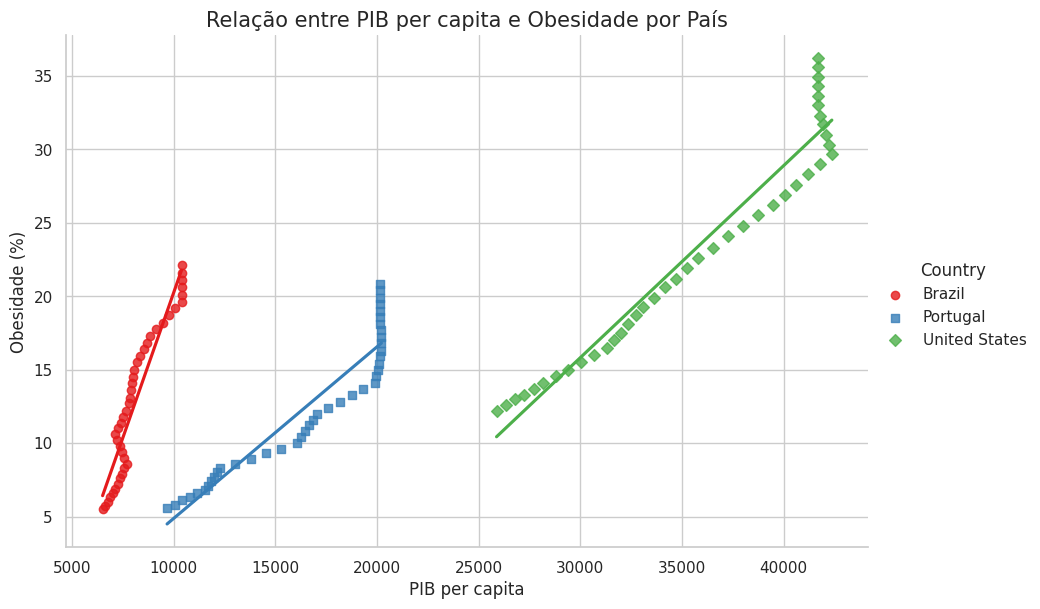

In [ ]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

# Criar o gráfico de dispersão com linhas de regressão
plt.figure(figsize=(10, 6))
scatter_plot = sns.lmplot(
    data=df_filtered,
    x=' GDP_pp ',
    y='Obesity',
    hue='Country',
    ci=None,  # Remove o intervalo de confiança para as linhas de regressão
    height=6,
    aspect=1.5,
    markers=['o', 's', 'D'],  # Diferentes marcadores para cada país
    palette='Set1'  # Paleta de cores para diferenciar os países
)

# Ajustar o título e os rótulos dos eixos
plt.title('Relação entre PIB per capita e Obesidade por País', fontsize=15)
plt.xlabel('PIB per capita', fontsize=12)
plt.ylabel('Obesidade (%)', fontsize=12)

# Mostrar o gráfico
plt.show()

Ao analisar as diferenças entre Brasil, Estados Unidos e Portugal em relação à correlação entre PIB per capita e obesidade, podemos destacar algumas possíveis razões para as discrepâncias nos resultados:

1. **Contexto Socioeconômico**:
   - Cada país possui um contexto socioeconômico único, com diferentes níveis de desenvolvimento econômico, distribuição de renda, acesso a serviços de saúde e políticas públicas relacionadas à alimentação e estilo de vida. Essas diferenças podem influenciar a relação entre PIB per capita e obesidade.

2. **Hábitos Alimentares e Estilo de Vida**:
   - Os hábitos alimentares e o estilo de vida variam entre os países. Por exemplo, o padrão alimentar tradicional pode diferir significativamente entre o Brasil, os Estados Unidos e Portugal, afetando os índices de obesidade em cada país.

3. **Políticas de Saúde Pública e Prevenção**:
   - As políticas de saúde pública e prevenção da obesidade também podem ser diferentes em cada país. Isso inclui iniciativas governamentais relacionadas à educação nutricional, acesso a alimentos saudáveis, restrições à publicidade de alimentos não saudáveis, promoção da atividade física, entre outros.

4. **Cultura e Percepções Sociais**:
   - A cultura e as percepções sociais em relação à alimentação, imagem corporal e saúde podem variar entre os países. Por exemplo, atitudes em relação ao peso corporal, dietas da moda e estigma associado à obesidade podem influenciar os padrões de obesidade em cada país.

5. **Estrutura Demográfica**:
   - As características demográficas de cada país, como idade, gênero, etnia e composição populacional, podem influenciar os padrões de obesidade e sua relação com o PIB per capita.

### Análise de Dados Temporais
A análise de correlação atual considera apenas os dados agregados. No entanto, ao analisar dados ao longo do tempo, pode-se obter insights mais profundos.

- **Analisar Tendências Temporais**: Verificar se a correlação entre obesidade e PIB per capita muda ao longo do tempo. Isso pode ser feito calculando correlações em diferentes períodos (por exemplo, décadas).

In [ ]:
# Calcular correlações em diferentes períodos
periods = [(1980, 1990), (1990, 2000), (2000, 2010), (2010, 2016)]
correlations = {}

for start, end in periods:
    df_period = df_combined[(df_combined['Year'] >= start) & (df_combined['Year'] <= end)]
    correlation = df_period[' GDP_pp '].corr(df_period['Obesity'])
    correlations[f"{start}-{end}"] = correlation

#print(correlations)

print("Correlação por período:\n")
for period, correlation in correlations.items():
    print(f"{period}: {correlation}")

Correlação por período:

1980-1990: 0.4418656368263518
1990-2000: 0.3738268428724107
2000-2010: 0.3393752217797487
2010-2016: 0.3172573434592462


Correlação dentro de diferentes regiões para verificar se a relação entre obesidade e PIB per capita varia entre regiões.

In [ ]:
# Calcular correlação por região
regions = df_combined['Region'].unique()
regional_correlations = {}

for region in regions:
    df_region = df_combined[df_combined['Region'] == region]
    correlation = df_region[' GDP_pp '].corr(df_region['Obesity'])
    regional_correlations[region] = correlation

for region, correlation in regional_correlations.items():
    print(f"{region}: {correlation}")

Middle East, North Africa, and Greater Arabia: 0.4489328667324288
Europe: 0.2081471753905415
Sub-Saharan Africa: 0.48868476839632063
Central America and the Caribbean: 0.4722482140084847
South America: 0.6911213134904062
Australia and Oceania: 0.12302975085762904
Asia: 0.07690463612528585
North America: 0.4987348160185277


Hipóteses possíveis para explicar a alta correlação na América do Sul:

* **Mudança na dieta:** Com o crescimento econômico, pode haver uma mudança na alimentação da população, indo de uma dieta baseada em alimentos frescos para outra mais industrializada e processada, geralmente rica em açúcares e gorduras. Isso poderia contribuir para o aumento da obesidade.
* **Urbanização:** O desenvolvimento econômico muitas vezes está associado à urbanização. Nas cidades, as pessoas tendem a ter menos atividade física diária e o acesso a fast food e alimentos processados pode ser maior.
* **Menos acesso a alimentos saudáveis:** Em alguns casos, o crescimento econômico pode não ser uniforme, beneficiando apenas uma parcela da população. Isso poderia levar a uma situação onde as pessoas com menor poder aquisitivo teriam menos acesso a alimentos saudáveis, como frutas, verduras e legumes frescos.